In [3]:

import yaml
import os
import h5py, json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
%matplotlib inline


In [4]:
with open('./pipelines/im_test_gail_pipeline.yaml', 'r') as f:
    spec = yaml.load(f)

checkptdir = os.path.join(spec['options']['storagedir'], spec['options']['checkpt_subdir'])
results_full_path = os.path.join(checkptdir, spec['options']['results_filename'])

print(spec['options']['results_filename'])

with pd.HDFStore(results_full_path, 'r') as f:
    res = f['results']
    num_traj_list    = spec['training']['dataset_num_trajs']
    performance_list = defaultdict(lambda: np.zeros(spec['training']['runs']))
    for alg, num_trajs, run, return_list in zip(res['alg'], res['num_trajs'], res['run'], res['alg_traj_returns']):
        performance_list[alg,num_trajs][run] = np.mean(return_list)
        print('{} with {} trajs at {} run: {}'.format(alg,num_trajs,run,np.mean(return_list)))

results.h5
ga_mixture_0 with 4 trajs at 0 run: 3666.07071019
ga_mixture_0 with 11 trajs at 0 run: 3671.33657784
ga_mixture_0 with 18 trajs at 0 run: 3603.23979465
ga_mixture_0 with 25 trajs at 0 run: 3631.79722087
ga_mixture_1 with 4 trajs at 0 run: 185.140935122
ga_mixture_1 with 11 trajs at 0 run: 194.395554206
ga_mixture_1 with 18 trajs at 0 run: 404.456015696
ga_mixture_1 with 25 trajs at 0 run: 377.796920653
ga with 4 trajs at 0 run: 3621.98965124
ga with 11 trajs at 0 run: 3638.76535412
ga with 18 trajs at 0 run: 3613.28361675
ga with 25 trajs at 0 run: 3611.75583947


In [5]:
mean_perf_list = np.zeros([len(spec['training']['algorithms']),len(spec['training']['dataset_num_trajs'])])
std_perf_list = np.zeros([len(spec['training']['algorithms']),len(spec['training']['dataset_num_trajs'])])
min_perf_list = np.zeros([len(spec['training']['algorithms']),len(spec['training']['dataset_num_trajs'])])
max_perf_list = np.zeros([len(spec['training']['algorithms']),len(spec['training']['dataset_num_trajs'])])
alg_list = np.unique(res['alg'])
for num_trajs, num_trajs_idx in zip(num_traj_list, range(len(num_traj_list))):
    for alg, alg_idx in zip(alg_list, range(len(alg_list))):
        mean_perf_list[alg_idx,num_trajs_idx] = np.mean(performance_list[alg,num_trajs])
        std_perf_list[alg_idx,num_trajs_idx] = np.std(performance_list[alg,num_trajs])
        min_perf_list[alg_idx,num_trajs_idx] = np.min(performance_list[alg,num_trajs])
        max_perf_list[alg_idx,num_trajs_idx] = np.max(performance_list[alg,num_trajs])

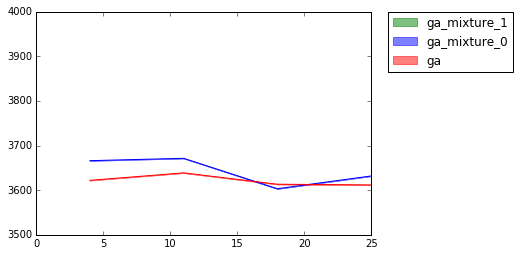

In [8]:
color_style = ['r','b','g']

for alg_idx in range(len(alg_list))[::-1]:
    plt.plot(num_traj_list, mean_perf_list[alg_idx,:], '-',color=color_style[alg_idx])
    plt.fill_between(num_traj_list, mean_perf_list[alg_idx,:]-std_perf_list[alg_idx,:], mean_perf_list[alg_idx,:]+std_perf_list[alg_idx,:],
                    label=alg_list[alg_idx],color=color_style[alg_idx], alpha=0.5)
plt.ylim((3500,4000))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()